In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read full dataframe
df = pd.read_csv('gs://datacamp-202518.appspot.com/data/claims/beneficiary/2010_Basic_Stand_Alone_Carrier_Line_Items_PUF.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(2801660, 11)

In [5]:
df.nunique()

BENE_SEX_IDENT_CD               2
BENE_AGE_CAT_CD                 6
CAR_LINE_ICD9_DGNS_CD        1233
CAR_LINE_HCPCS_CD            4900
CAR_LINE_BETOS_CD              98
CAR_LINE_SRVC_CNT             167
CAR_LINE_PRVDR_TYPE_CD          6
CAR_LINE_CMS_TYPE_SRVC_CD      20
CAR_LINE_PLACE_OF_SRVC_CD      28
CAR_HCPS_PMT_AMT               80
CAR_LINE_CNT                 4542
dtype: int64

In [6]:
df.dtypes

BENE_SEX_IDENT_CD             int64
BENE_AGE_CAT_CD               int64
CAR_LINE_ICD9_DGNS_CD        object
CAR_LINE_HCPCS_CD            object
CAR_LINE_BETOS_CD            object
CAR_LINE_SRVC_CNT             int64
CAR_LINE_PRVDR_TYPE_CD        int64
CAR_LINE_CMS_TYPE_SRVC_CD    object
CAR_LINE_PLACE_OF_SRVC_CD     int64
CAR_HCPS_PMT_AMT              int64
CAR_LINE_CNT                  int64
dtype: object

In [7]:
df

,BENE_SEX_IDENT_CD,BENE_AGE_CAT_CD,CAR_LINE_ICD9_DGNS_CD,CAR_LINE_HCPCS_CD,CAR_LINE_BETOS_CD,CAR_LINE_SRVC_CNT,CAR_LINE_PRVDR_TYPE_CD,CAR_LINE_CMS_TYPE_SRVC_CD,CAR_LINE_PLACE_OF_SRVC_CD,CAR_HCPS_PMT_AMT,CAR_LINE_CNT
0,1,1,NaN,99213,M1B,1,1,1,11,55,2
1,1,1,NaN,A0425,O1A,1,3,D,41,5,46
2,1,1,NaN,A0425,O1A,1,3,D,41,10,47
3,1,1,NaN,A0425,O1A,2,3,D,41,10,363
4,1,1,NaN,A0425,O1A,2,3,D,41,15,12
...,...,...,...,...,...,...,...,...,...,...,...
2801655,2,6,V82,99213,M1B,1,1,1,11,55,1
2801656,2,6,V82,A0429,O1A,1,3,D,41,275,7
2801657,2,6,V82,G0328,T1H,1,1,5,11,25,8
2801658,2,6,V86,80053,T1B,1,5,5,81,15,1


In [8]:
icds = (df.CAR_LINE_ICD9_DGNS_CD.unique())
s = pd.Series(icds)
s.to_csv('/home/jupyter/data/cms/icds.csv',header=None, index=None)

- - -

## At this point I think I should strip out the letters from the ICD codes

+ **V** codes are "Factors influencing health status and contact with health services"
+ Not sure what **E** codes are

> so this will be an exercise in filtering variables from the dataframe

In [9]:
# first, figure out how to exclude patterns from a pandas selection

raw_data = {'first_name': ['Jason', 'Molly', np.nan, np.nan, np.nan], 
        'nationality': ['USA', 'USA', 'France', 'UK', 'UK'], 
        'age': [42, 52, 36, 24, 70]}
test = pd.DataFrame(raw_data, columns = ['first_name', 'nationality', 'age'])
test

,first_name,nationality,age
0,Jason,USA,42
1,Molly,USA,52
2,NaN,France,36
3,NaN,UK,24
4,NaN,UK,70


In [10]:
# this seems like a compact way to do it

search_values = ['UK','France']
rand = test[~test.nationality.str.contains('|'.join(search_values))]
rand

,first_name,nationality,age
0,Jason,USA,42
1,Molly,USA,52


In [11]:
# let me also try this using that **df.loc** way of 'slicing' a dataframe
# ... which I DO NOT UNDERSTAND !!

rand2 = test.loc[
    # the tilde mean 'not contains'
    ~test.nationality.str.contains('|'.join(search_values))
]
rand2

,first_name,nationality,age
0,Jason,USA,42
1,Molly,USA,52


**⟰ Ok, nice! Now can filter out the "V" and "E" ICD codes:**

- - -

In [12]:
letter_codes = ['V','E']
onlynumbers = df.loc[
    # match anything that does not have "V" or "E" codes
    ~df.CAR_LINE_ICD9_DGNS_CD.str.contains('|'.join(letter_codes), na=False)
    ,:]

In [13]:
# check whether those numbers are actually numbers
print (onlynumbers.CAR_LINE_ICD9_DGNS_CD.dtypes)

object


In [14]:
# Ok, not a number yet.
onlynumbers.loc[:, "CAR_LINE_ICD9_DGNS_CD"] = onlynumbers.loc[:, "CAR_LINE_ICD9_DGNS_CD"].apply(pd.to_numeric, errors = 'coerce')

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [15]:
# did that change it?
print (onlynumbers.CAR_LINE_ICD9_DGNS_CD.dtypes)

float64


In [16]:
print (onlynumbers.CAR_LINE_ICD9_DGNS_CD.unique())

[ nan   3.   5.   7.   8.   9.  11.  15.  31.  34.  35.  36.  38.  39.
  40.  41.  42.  45.  47.  49.  52.  53.  54.  57.  61.  66.  70.  74.
  75.  77.  78.  79.  82.  83.  87.  88.  90.  91.  94.  97.  98.  99.
 110. 111. 112. 114. 115. 116. 117. 123. 126. 130. 131. 132. 133. 134.
 135. 136. 137. 138. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149.
 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163.
 164. 170. 171. 172. 173. 175. 176. 185. 186. 187. 188. 189. 190. 191.
 192. 193. 194. 195. 196. 197. 198. 199. 200. 201. 202. 203. 204. 205.
 206. 207. 208. 209. 210. 211. 212. 213. 214. 215. 216. 217. 222. 223.
 224. 225. 226. 227. 228. 229. 230. 231. 232. 233. 235. 236. 237. 238.
 239. 240. 241. 242. 243. 244. 245. 246. 249. 250. 251. 252. 253. 255.
 257. 258. 259. 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 270.
 271. 272. 273. 274. 275. 276. 277. 278. 279. 280. 281. 282. 283. 284.
 285. 286. 287. 288. 289. 290. 291. 292. 293. 294. 295. 296. 297. 298.
 299. 

- - -

## Ok, those are numbers, so I can find the ones in the ICD9 code range I want 

> Let's get the ICD codes between 580 & 629 (from [this reference](https://www.dropbox.com/s/z4xqytytdppjuzw/2010_BSA_Carrier_Line_Items_PUF_DataDic.pdf?dl=0))

![according to the variable keys](https://i.imgur.com/iwRboAbl.png)

In [17]:
uticodes = onlynumbers.loc[
    # match anything between 
    onlynumbers.CAR_LINE_ICD9_DGNS_CD.between(580,629)
    ,:]    
print (uticodes.CAR_LINE_ICD9_DGNS_CD.unique())

[580. 581. 582. 583. 584. 585. 586. 587. 588. 589. 590. 591. 592. 593.
 594. 595. 596. 597. 598. 599. 600. 601. 602. 603. 604. 605. 606. 607.
 608. 610. 611. 616. 612. 614. 615. 617. 618. 619. 620. 621. 622. 623.
 624. 625. 626. 627. 628. 629.]


In [18]:
print ("{} percent of dataset are *Diseases of the Urinary Tract System* ".format((uticodes.shape[0]/df.shape[0])*100))

5.79656346594519 percent of dataset are *Diseases of the Urinary Tract System* 


## So how let's look at the distribution of these diagnoses across the various types

![Types of clinics](https://i.imgur.com/grOsQC2l.png)

In [25]:
solo_hcp = uticodes.loc[uticodes.CAR_LINE_PRVDR_TYPE_CD == 1,:]
small_clinic = uticodes.loc[uticodes.CAR_LINE_PRVDR_TYPE_CD == 0,:]
hospital = uticodes.loc[uticodes.CAR_LINE_PRVDR_TYPE_CD == 3,:]
large_clinic = uticodes.loc[uticodes.CAR_LINE_PRVDR_TYPE_CD == 5,:]

In [30]:
small_clinic.CAR_LINE_PRVDR_TYPE_CD.value_counts()

0    15640
Name: CAR_LINE_PRVDR_TYPE_CD, dtype: int64

In [31]:
uticodes.CAR_LINE_PRVDR_TYPE_CD.value_counts()

1    116734
5     20762
0     15640
7      6480
3      2784
Name: CAR_LINE_PRVDR_TYPE_CD, dtype: int64

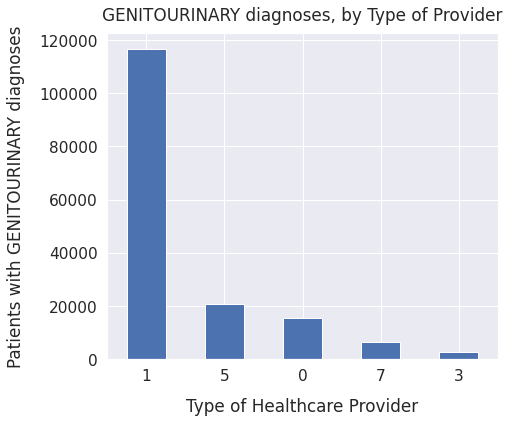

In [35]:
sns.set(font_scale=1.4)
uticodes.CAR_LINE_PRVDR_TYPE_CD.value_counts().plot(kind='bar', figsize=(7, 6), rot=0);
plt.xlabel("Type of Healthcare Provider", labelpad=14)
plt.ylabel("Patients with GENITOURINARY diagnoses", labelpad=14)
plt.title("GENITOURINARY diagnoses, by Type of Provider", y=1.02);

In [36]:
uticodes.CAR_LINE_ICD9_DGNS_CD.nunique()

48

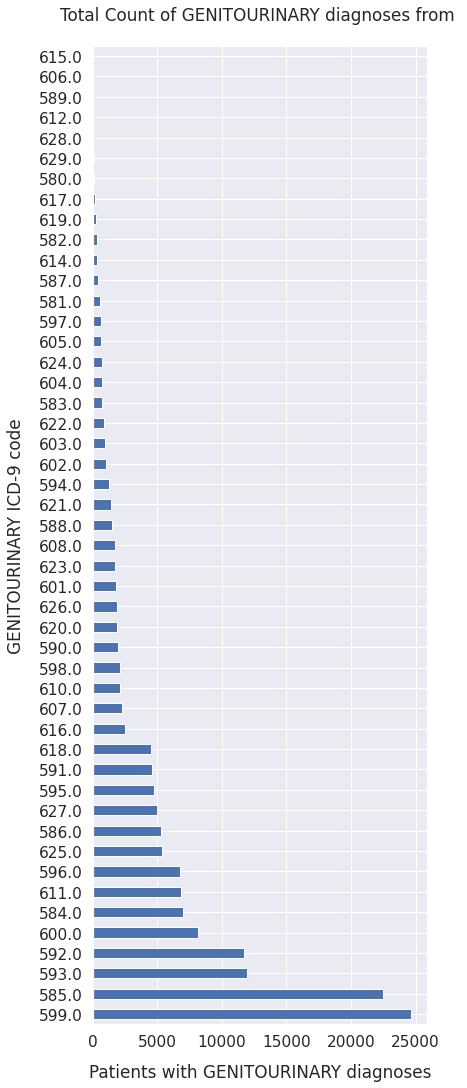

In [42]:
sns.set(font_scale=1.4)
uticodes.CAR_LINE_ICD9_DGNS_CD.value_counts().plot(kind='barh', figsize=(6, 18), rot=0);
plt.ylabel("GENITOURINARY ICD-9 code", labelpad=14)
plt.xlabel("Patients with GENITOURINARY diagnoses", labelpad=14)
plt.title("Total Count of GENITOURINARY diagnoses from ", y=1.02);

### Ok, very well

> **Next Steps**: Get a Lookup Table of the ICD-9 codes listed above

- - -

,BENE_SEX_IDENT_CD,BENE_AGE_CAT_CD,CAR_LINE_ICD9_DGNS_CD,CAR_LINE_HCPCS_CD,CAR_LINE_BETOS_CD,CAR_LINE_SRVC_CNT,CAR_LINE_PRVDR_TYPE_CD,CAR_LINE_CMS_TYPE_SRVC_CD,CAR_LINE_PLACE_OF_SRVC_CD,CAR_HCPS_PMT_AMT,CAR_LINE_CNT
127463,1,1,580.0,36415,T1A,1,1,5,11,5,2
127464,1,1,580.0,36415,T1A,1,5,5,81,5,2
127465,1,1,580.0,80048,T1B,1,5,5,81,10,2
127466,1,1,580.0,80069,T1H,1,5,5,81,10,1
127467,1,1,580.0,82570,T1H,1,5,5,81,5,2
...,...,...,...,...,...,...,...,...,...,...,...
2697470,2,6,629.0,99212,M1B,1,1,1,11,30,2
2697471,2,6,629.0,99213,M1B,1,1,1,11,50,2
2697472,2,6,629.0,99214,M1B,1,1,1,11,75,5
2697473,2,6,629.0,99231,M2B,1,1,1,21,30,7
